https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/

https://amueller.github.io/COMS4995-s19/homeworks/homework1-spring-2019.pdf

# Task 2.1

Re-create a plot from http://www.tylervigen.com/spurious-correlations

Choosen one: _Math Doctorates awarded correlate with Uranium stored in US power plants_

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
years = list(range(1996, 2009))
math_doctorates = [1122, 1123, 1177, 1083, 1050, 1010, 919, 993, 1076, 1205, 1325, 1393, 1399]
uranium_stored = [66.1, 65.9, 65.8, 58.3, 54.8, 55.6, 53.5, 45.6, 57.7, 64.7, 77.5, 85.2, 81.9]
df = pd.DataFrame(data={
    'year': years,
    'math_doctorates': math_doctorates,
    'uranium_stored': uranium_stored,
})
df

,year,math_doctorates,uranium_stored
0,1996,1122,66.1
1,1997,1123,65.9
2,1998,1177,65.8
3,1999,1083,58.3
4,2000,1050,54.8
5,2001,1010,55.6
6,2002,919,53.5
7,2003,993,45.6
8,2004,1076,57.7
9,2005,1205,64.7


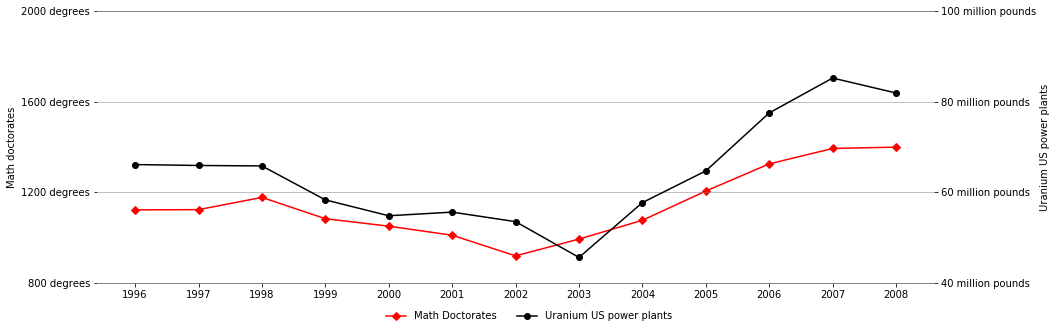

In [3]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.subplots(1)

ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df.year)

ax1.plot(df.math_doctorates, marker='D', color='red')
ax1.set_ylabel('Math doctorates')
ticks = [800, 1200, 1600, 2000]
ax1.set_yticks(ticks)
ax1.set_yticklabels([f'{x} degrees' for x in ticks])

ax2 = ax1.twinx()

ax2.plot(df.uranium_stored, marker='o', color='black')
ax2.set_ylabel('Uranium US power plants')
ticks = [40, 60, 80, 100]
ax2.set_yticks(ticks)
ax2.set_yticklabels([f'{x} million pounds' for x in ticks])

fig.legend(['Math Doctorates', 'Uranium US power plants'], loc='lower center', frameon=False, ncol=2)

ax1.axhline(1200, color='gray', linewidth=0.5)
ax1.axhline(1600, color='gray', linewidth=0.5)

ax1.spines['right'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['bottom'].set_color('gray')
ax1.spines['top'].set_color('gray')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['bottom'].set_color('gray')
ax2.spines['top'].set_color('gray')

# Task 2.2

Re-create this plot https://rpubs.com/nandong/imlp-ch1-iris

In [4]:
from sklearn.datasets import load_iris
import numpy as np

In [5]:
iris = load_iris()

In [6]:
data = iris['data']
target = iris['target']

No handles with labels found to put in legend.


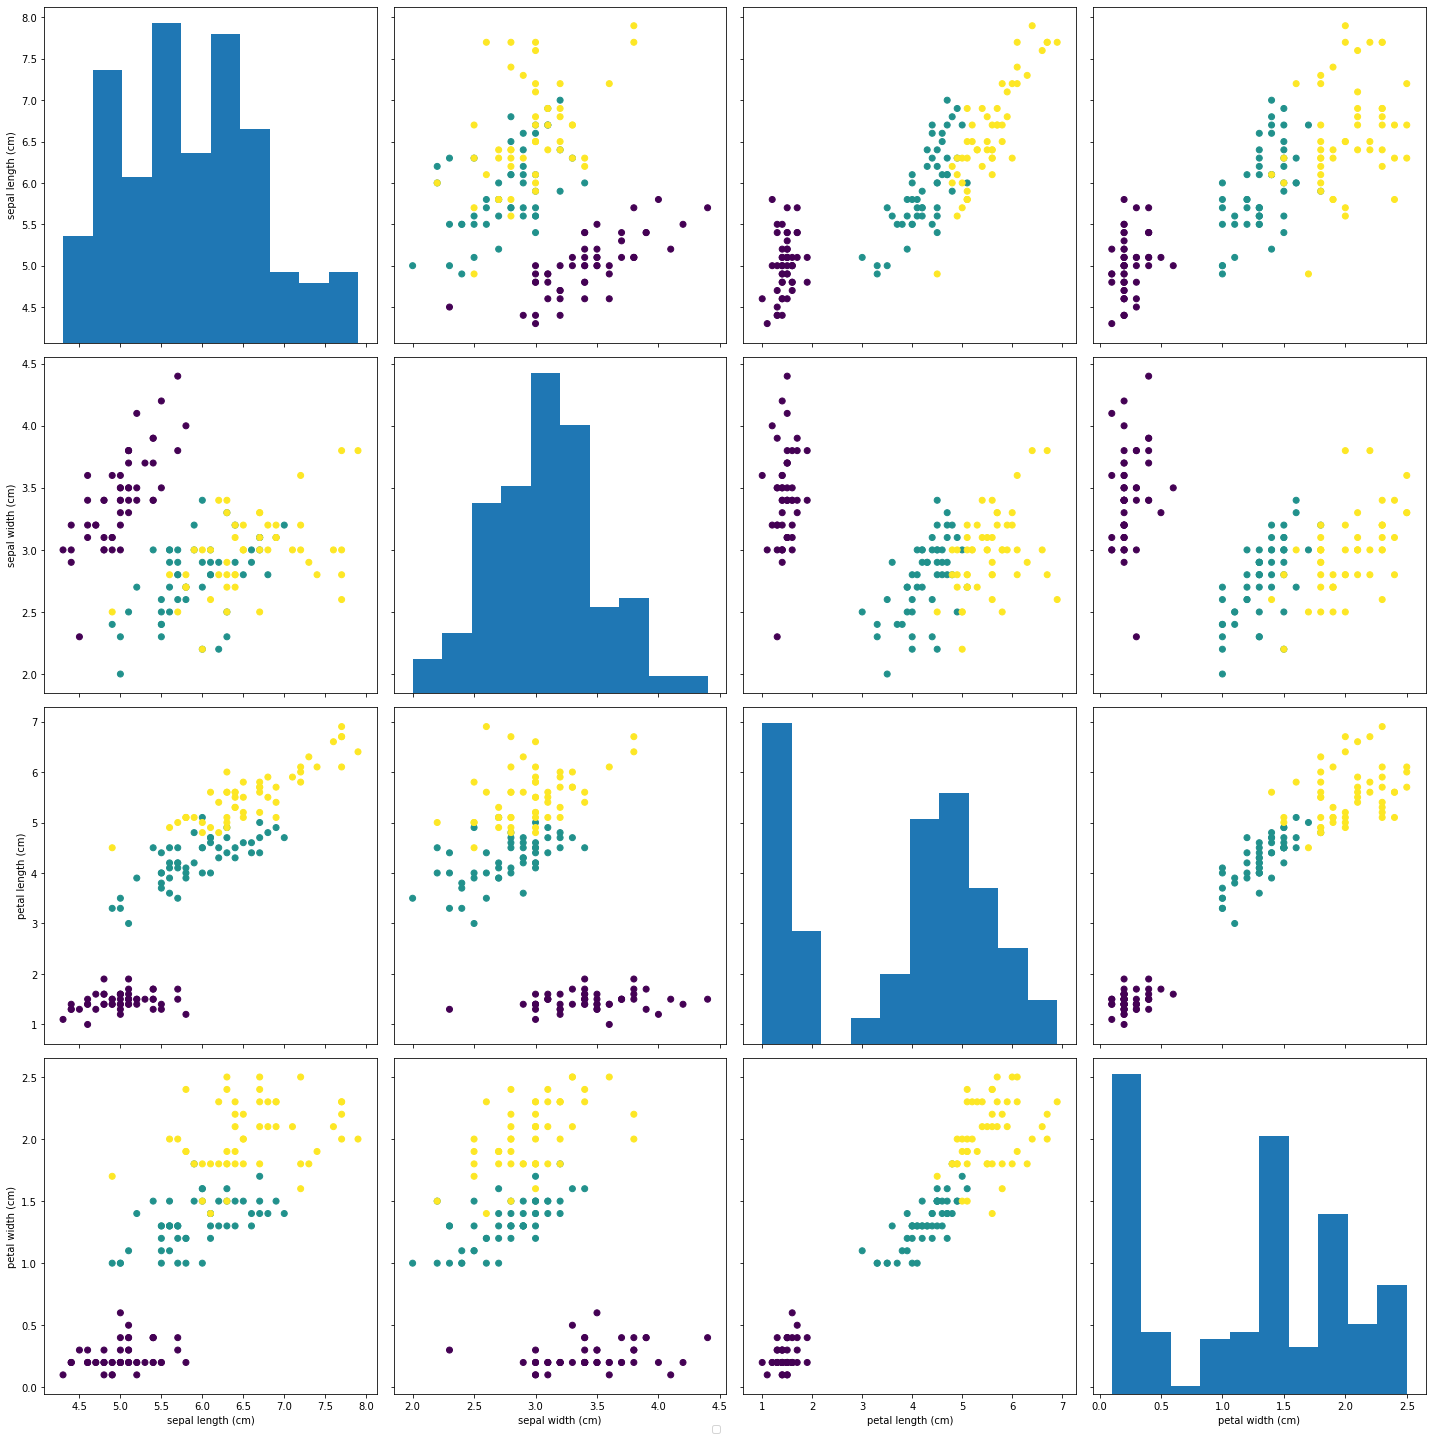

In [7]:
n_features = data.shape[1]
(fig, axes) = plt.subplots(
    n_features,
    n_features,
    figsize=(20, 20),
    sharex='col',
    sharey='row',
    squeeze=False
)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

for j1 in range(n_features):
    for j2 in range(n_features):
        ax = axes[j1][j2]
        if j1 == j2:
            ax2 = ax.twinx()
            ax2.hist(data[:, j1])
            ax2.set_axis_off()
        else:
            ax.scatter(
                data[:, j2],
                data[:, j1],
                c=target
            )
        
        if j2 == 0:
            ax.set_ylabel(iris['feature_names'][j1])
        
        if j1 == (n_features - 1):
            ax.set_xlabel(iris['feature_names'][j2])

fig.legend(loc='lower center', ncol=3)
fig.tight_layout()

# Task 2.3

Auto MPG Plots

In [8]:
from mlxtend.data import autompg_data

In [18]:
mpg = pd.read_csv('https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/ggplot2/mpg.csv')

In [19]:
mpg.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


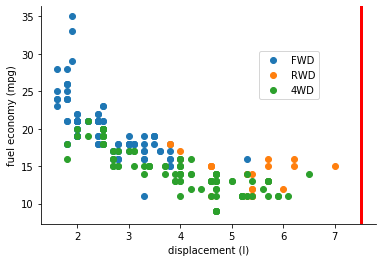

In [44]:
# Figure 18.1
(fig, ax) = plt.subplots(1, 1)
for (drv, label) in [('f', 'FWD'), ('r', 'RWD'), ('4', '4WD')]:
    data = mpg[mpg.drv == drv]
    ax.scatter(data.displ, data.cty, label=label)
ax.set_xlabel('displacement (l)')
ax.set_ylabel('fuel economy (mpg)')
ax.axvline(7.5, color='r', linewidth=3)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
fig.legend(loc='upper right', bbox_to_anchor=(0.75, 0.75))

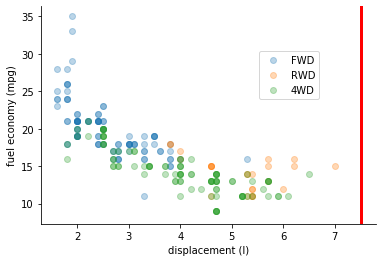

In [45]:
# Figure 18.2
(fig, ax) = plt.subplots(1, 1)
for (drv, label) in [('f', 'FWD'), ('r', 'RWD'), ('4', '4WD')]:
    data = mpg[mpg.drv == drv]
    ax.scatter(data.displ, data.cty, label=label, alpha=0.3)
ax.set_xlabel('displacement (l)')
ax.set_ylabel('fuel economy (mpg)')
ax.axvline(7.5, color='r', linewidth=3)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
fig.legend(loc='upper right', bbox_to_anchor=(0.75, 0.75))

In [35]:
mpg[mpg.drv == 'f']

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
32,33,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
33,34,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize
34,35,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
